<a href="https://colab.research.google.com/github/hazkassb/Operation-Hack-The-Railroad/blob/master/Crimegraphs_GAcities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install xlrd

In [ ]:
# Importing packages
import matplotlib.pyplot as plt
import requests
import pandas as pd

In [ ]:
# Upload crime data from FBI
url2 = 'https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/tables/table-8/table-8-state-cuts/georgia.xls/output.xls'
r2 = requests.get(url2)

with open('fbi_data.xls', 'wb') as f2:
    f2.write(r2.content)

# Data capentry
fbi_df = pd.read_excel('fbi_data.xls', header=4)

# Changing column names
fbi_df = fbi_df.rename(columns={"Population" : "population", "Violent\ncrime" : "violent_crime", "Murder and\nnonnegligent\nmanslaughter" : "murder", "Rape1" : "rape",})
fbi_df = fbi_df.rename(columns={ "Robbery" : "robbery", "Aggravated\nassault" : "assault", "Property\ncrime" : "property", "Burglary" : "burglary", "Larceny-\ntheft" : "larceny"})
fbi_df = fbi_df.rename(columns={ "Motor\nvehicle\ntheft" : "vehicle_theft", "Arson2" : "arson"})

# Slicing dataframe
fbi_df = fbi_df[0:254]

# Upload coordinates and counties
ga_cities = pd.read_csv('ga-cities-coordinates.csv')
city = ga_cities.loc[:,['City']]
fbi_df = fbi_df.drop(['City'],axis=1)
fbi_df = pd.concat([city, fbi_df], axis=1, join='inner')

# Set indices = 'City' column
fbi_df = fbi_df.set_index('City')

In [ ]:
fbi_dfsorted = fbi_df.sort_values(by=['violent_crime'], inplace=False)
fbi_df = fbi_df[184:254]
#Slices the rows for 184 to 254
fbi_dfsorted = fbi_df.sort_values(by=['violent_crime'], inplace=False)
#from smallest to largest population based on violent crime

In [ ]:
fbi_dfVCdivPOP = fbi_dfsorted.drop("larceny", axis=1)
fbi_dfVCdivPOP = fbi_dfVCdivPOP.drop("property", axis=1)
fbi_dfVCdivPOP = fbi_dfVCdivPOP.drop("robbery", axis=1)
fbi_dfVCdivPOP = fbi_dfVCdivPOP.drop("assault", axis=1)
fbi_dfVCdivPOP = fbi_dfVCdivPOP.drop("vehicle_theft", axis=1)
fbi_dfVCdivPOP = fbi_dfVCdivPOP.drop("arson", axis=1)
fbi_dfVCdivPOP = fbi_dfVCdivPOP.drop("population", axis=1)
#takes out columns not needed

In [ ]:
fbi_dfVCdivPOP = fbi_dfVCdivPOP.sort_values(by=['violent_crime'], inplace=False)
#to make the column violent crime from 0 to largest  
fbi_newPercentage = fbi_dfVCdivPOP['violent_crime']/fbi_df['population']
#to find the percentage 
fbi_newPercentage = fbi_newPercentage.sort_values()
#sorts out the data
#fbi_newPercentage
#prints out the data for you to see

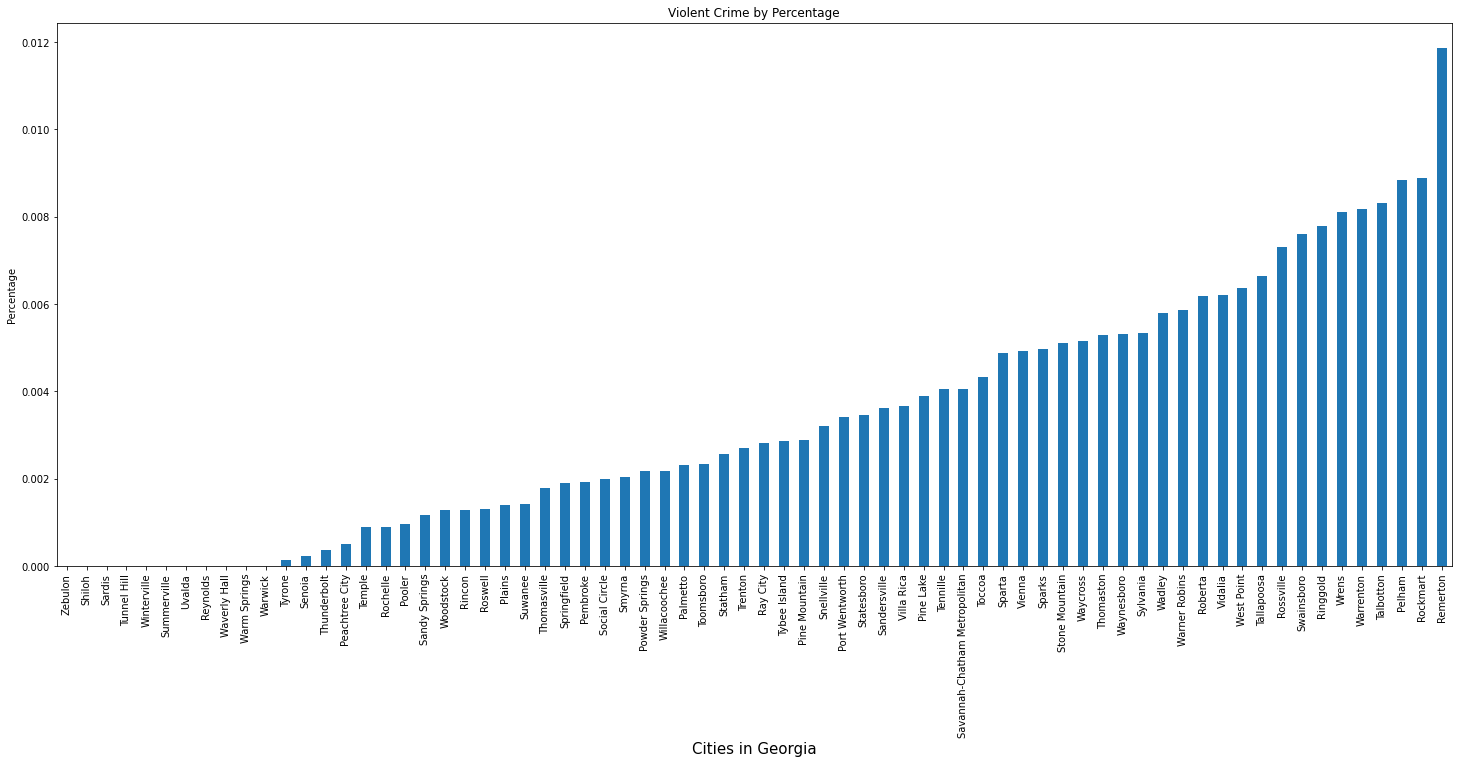

In [ ]:
my_plot = fbi_newPercentage.plot(kind='bar', stacked=True,title="Violent Crime by Percentage", fontsize=10)
#adjusts the title and the numbers in the x and y axis
my_plot.set_xlabel("Cities in Georgia", fontsize = 15)
#changes the x axis
my_plot.set_ylabel("Percentage")
#changes the y axis
my_plot = plt.rcParams['figure.figsize'] = [25,10]
#the size

###    <div align="center">In the following 70 Cities you can see the percentage of the top cities were Violent Crime occurs. This was calculated by taking the total amount of Violent Crime cases and then divided by the population of each given City.

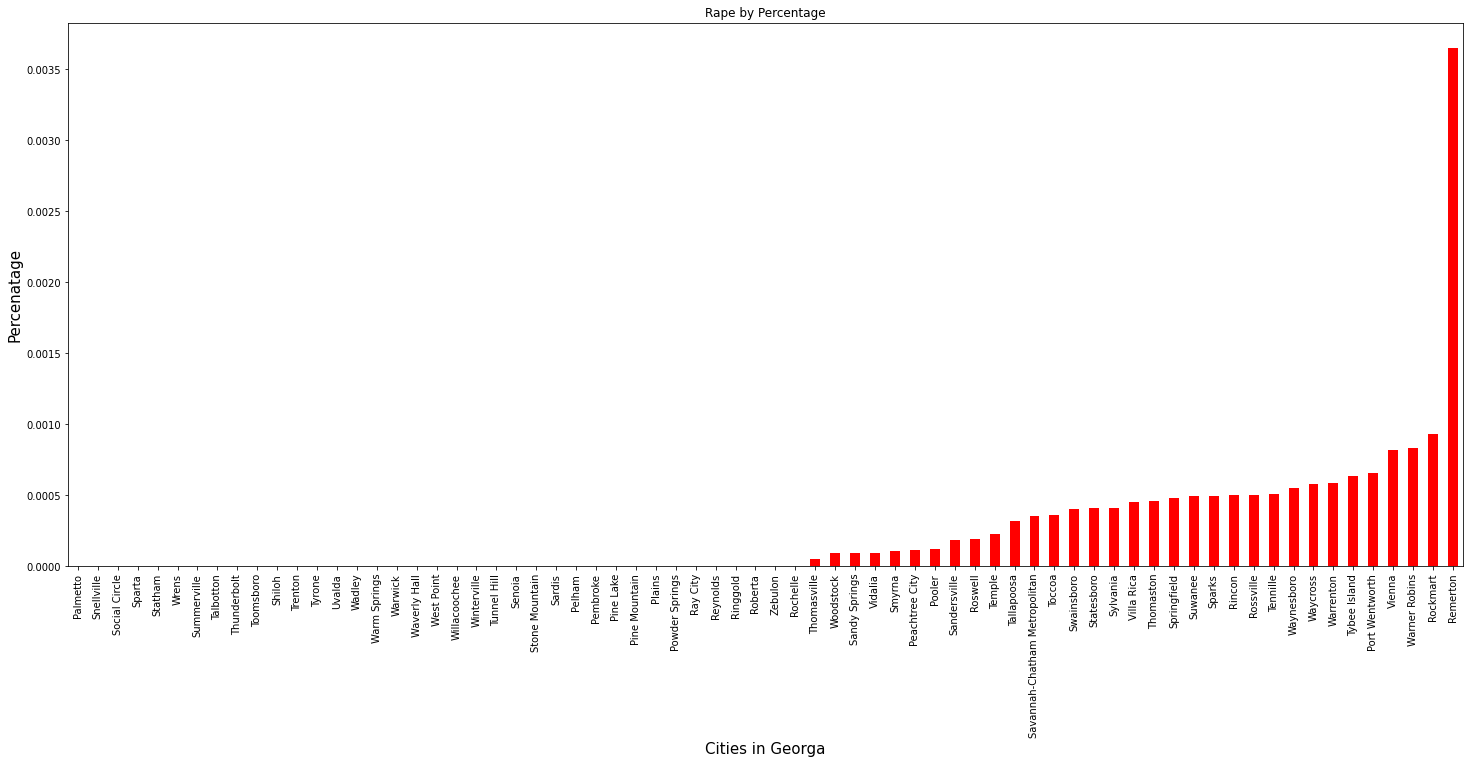

In [ ]:
fbi_dfVCdivPOP = fbi_dfVCdivPOP.sort_values(by=['rape'], inplace=False)
#sorts values by rape values from 0 to greatest
fbi_newPercentage2 = fbi_dfVCdivPOP['rape']/fbi_df['population']
#divides 
fbi_newPercentage2 = fbi_newPercentage2.sort_values()
#sorts the numbers in rape
fbi_newPercentage
my_plot = fbi_newPercentage2.plot(kind='bar', stacked=True,title="Rape by Percentage", fontsize = 10, color = 'red')
#how the graph will be
my_plot.set_xlabel("Cities in Georga",fontsize = 15, color = 'black')
#sets the x label
my_plot.set_ylabel("Percenatage",fontsize = 15)
#sets the y label
my_plot = plt.rcParams['figure.figsize'] = [25, 10]

###    <div align="center">                 In the following 70 Cities you can see the top 70 Cities with Rape Cases that have been reported. This was calculated by taking the total amount of Rape cases that occured, and then was divided by the population of each given City.

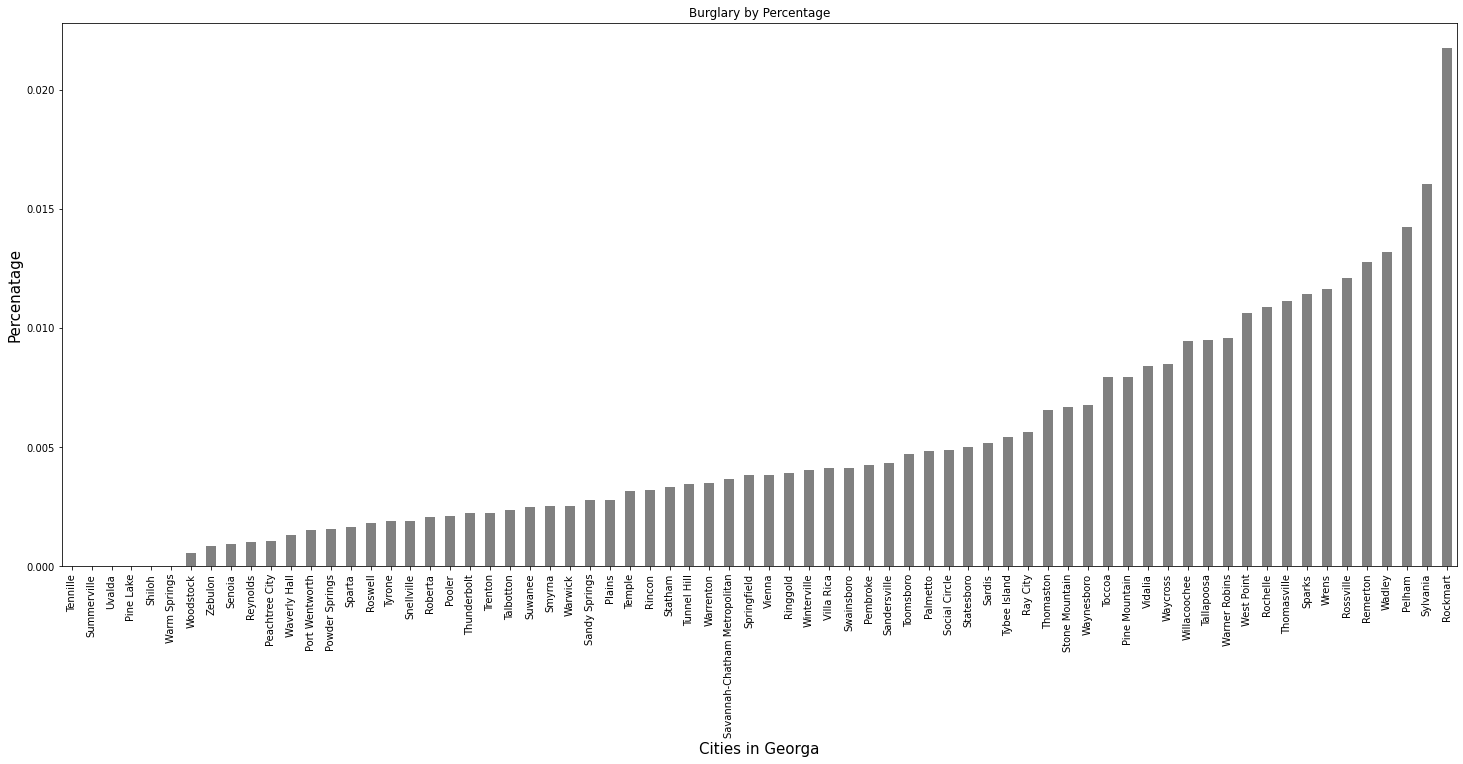

In [ ]:
fbi_dfVCdivPOP = fbi_dfVCdivPOP.sort_values(by=['burglary'], inplace=False)
fbi_newPercentage3 = fbi_dfVCdivPOP['burglary']/fbi_df['population']
fbi_newPercentage3 = fbi_newPercentage3.sort_values()
my_plot = fbi_newPercentage3.plot(kind='bar', stacked=True,title="Burglary by Percentage", fontsize = 10, color = 'gray')
my_plot.set_xlabel("Cities in Georga",fontsize = 15, color = 'black')
my_plot.set_ylabel("Percenatage",fontsize = 15)
my_plot = plt.rcParams['figure.figsize'] = [25, 10]

###    <div align="center">                 In the following 70 Cities you can see the top Cities with a high percentage of Burglary that occurs. This was calculated by taking the total amount of Burglary cases and dividing it by the population of each given City.

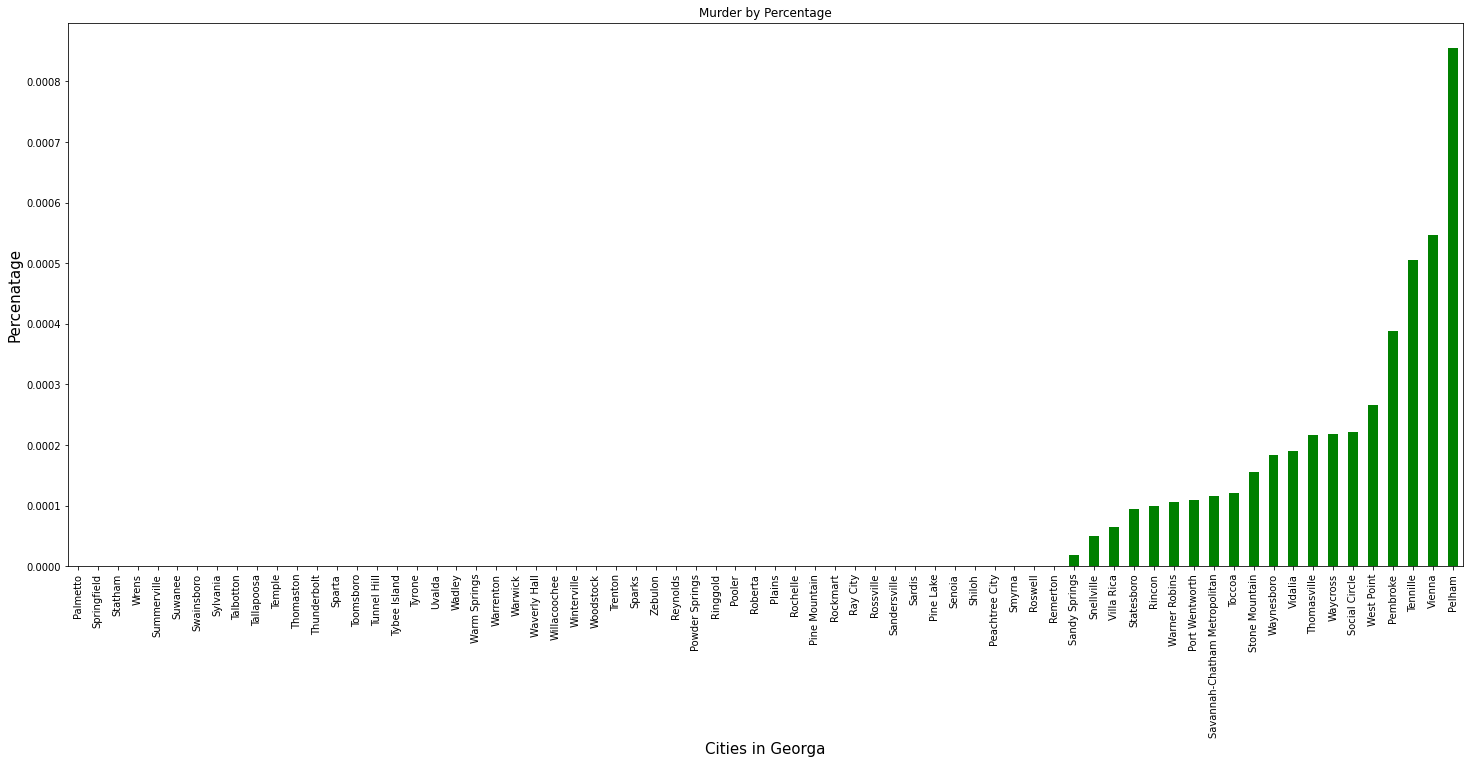

In [ ]:
fbi_dfVCdivPOP = fbi_dfVCdivPOP.sort_values(by=['murder'], inplace=False)
fbi_newPercentage4 = fbi_dfVCdivPOP['murder']/fbi_df['population']
fbi_newPercentage4 = fbi_newPercentage4.sort_values()
fbi_newPercentage4
my_plot1 = fbi_newPercentage4.plot(kind='bar', stacked=True,title="Murder by Percentage", fontsize = 10, color = 'green')
my_plot1.set_xlabel("Cities in Georga",fontsize = 15, color = 'black')
my_plot1.set_ylabel("Percenatage",fontsize = 15)
my_plot1 = plt.rcParams['figure.figsize'] = [25, 10]

###    <div align="center">                 In the following 70 Cities in Gergia you can see the cities with the highest percentage of Murder that occurs. This by calculated by taking the total amount of Murder cases and dividing it by the population of the given City.

In [ ]:
fbi_dfsorted = fbi_df.sort_values(by=['violent_crime'], inplace=False)
fbi_df = fbi_df[0:70]


In [ ]:
fbi_dfsorted = fbi_df.sort_values(by=['violent_crime'], inplace=False)
#from smallest to largest population based on violent crime

In [ ]:
fbi_dfVCdivPOP = fbi_dfsorted.drop("larceny", axis=1)
fbi_dfVCdivPOP = fbi_dfVCdivPOP.drop("property", axis=1)
fbi_dfVCdivPOP = fbi_dfVCdivPOP.drop("robbery", axis=1)
fbi_dfVCdivPOP = fbi_dfVCdivPOP.drop("assault", axis=1)
fbi_dfVCdivPOP = fbi_dfVCdivPOP.drop("vehicle_theft", axis=1)
fbi_dfVCdivPOP = fbi_dfVCdivPOP.drop("arson", axis=1)
fbi_dfVCdivPOP = fbi_dfVCdivPOP.drop("population", axis=1)
#takes out columns not needed

In [ ]:
fbi_dfVCdivPOP = fbi_dfVCdivPOP.sort_values(by=['violent_crime'], inplace=False)
fbi_newPercentage = fbi_dfVCdivPOP['violent_crime']/fbi_df['population']
fbi_newPercentage = fbi_newPercentage.sort_values()
#fbi_newPercentage
#sorts the numbers
#divides to get the new numbers

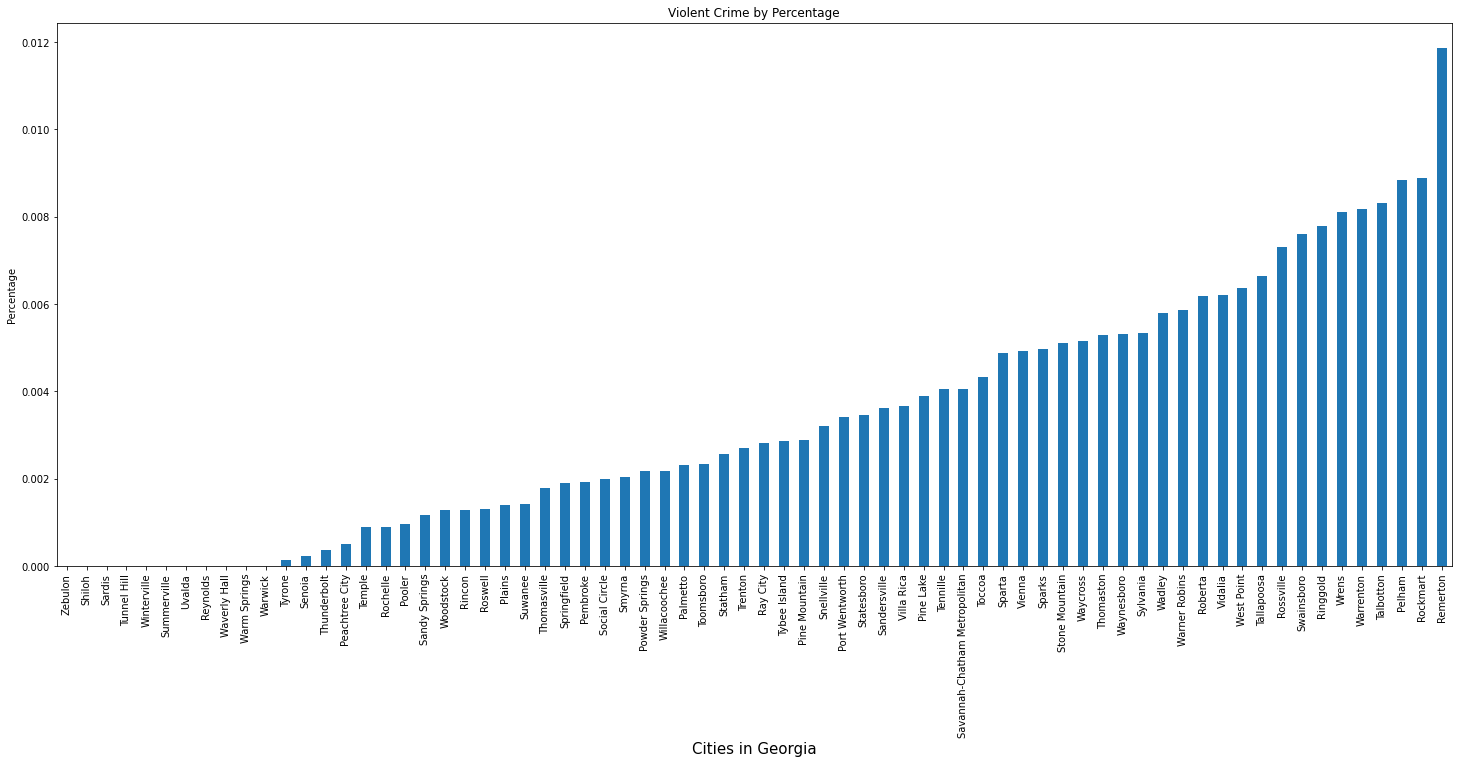

In [ ]:
my_plot = fbi_newPercentage.plot(kind='bar', stacked=True,title="Violent Crime by Percentage", fontsize=10)
my_plot.set_xlabel("Cities in Georgia", fontsize = 15)
my_plot.set_ylabel("Percentage")
my_plot = plt.rcParams['figure.figsize'] = [25,10]

###    <div align="center">                 In the following 70 Cities you can see the percentage of Violent Crime that occurs. This are the top 70 cities with the least Violent Crime. This was calculated by taking the total amount of Violent Crime cases and then divided by the population of each given City.

In [ ]:
fbi_dfVCdivPOP = fbi_dfVCdivPOP.sort_values(by=['rape'], inplace=False)
fbi_newPercentage2 = fbi_dfVCdivPOP['rape']/fbi_df['population']
fbi_newPercentage2 = fbi_newPercentage2.sort_values()
#sorts the numbers
#divides to get the new numbers

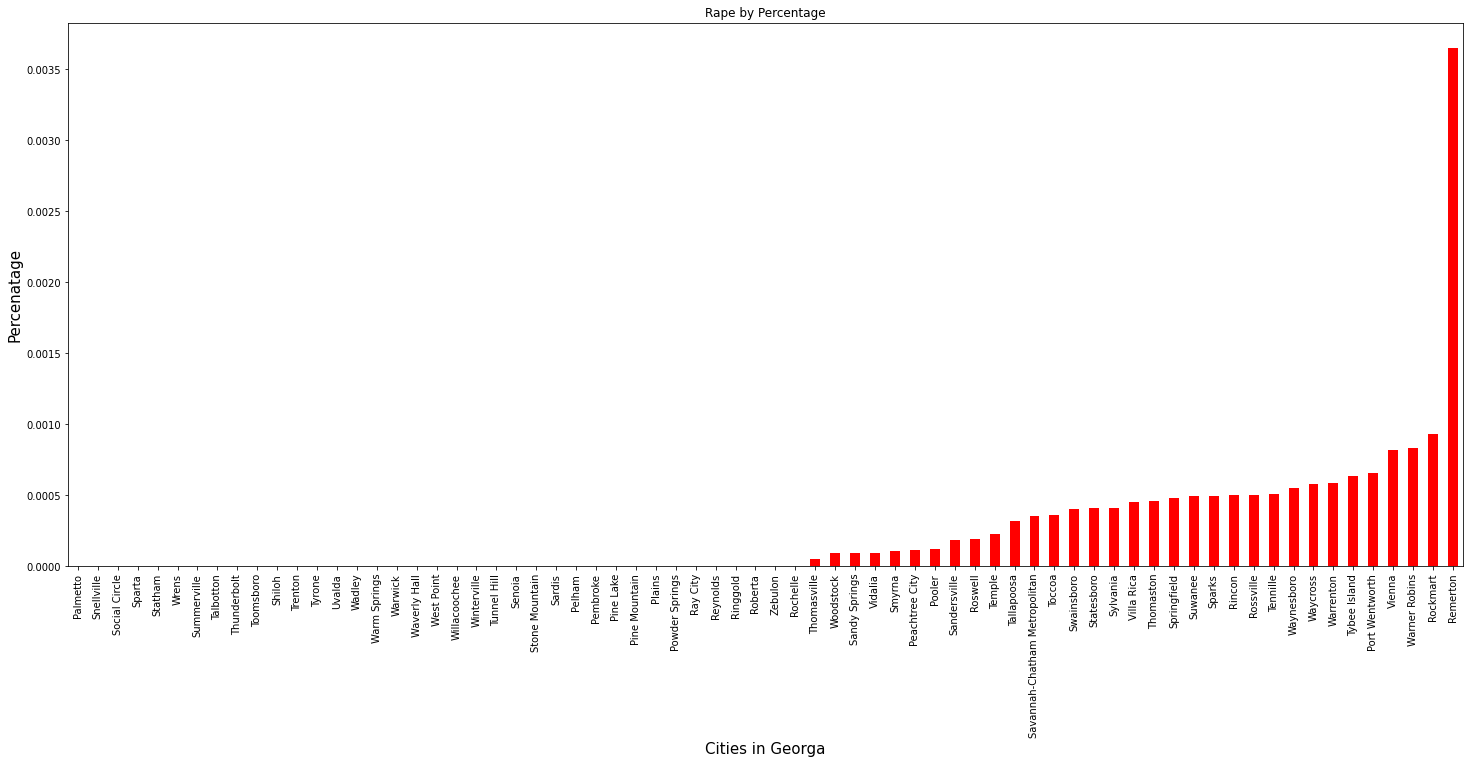

In [ ]:
my_plot = fbi_newPercentage2.plot(kind='bar', stacked=True,title="Rape by Percentage", fontsize = 10, color = 'red')
my_plot.set_xlabel("Cities in Georga",fontsize = 15, color = 'black')
my_plot.set_ylabel("Percenatage",fontsize = 15)
my_plot = plt.rcParams['figure.figsize'] = [25, 10]

###    <div align="center">                 In the following 70 Cities you can see the percentage of Rape Cases that have been reported. These cities are the cities with the least cases. This was calculated by taking the total amount of Rape cases that occured, and then was divided by the population of each given City.

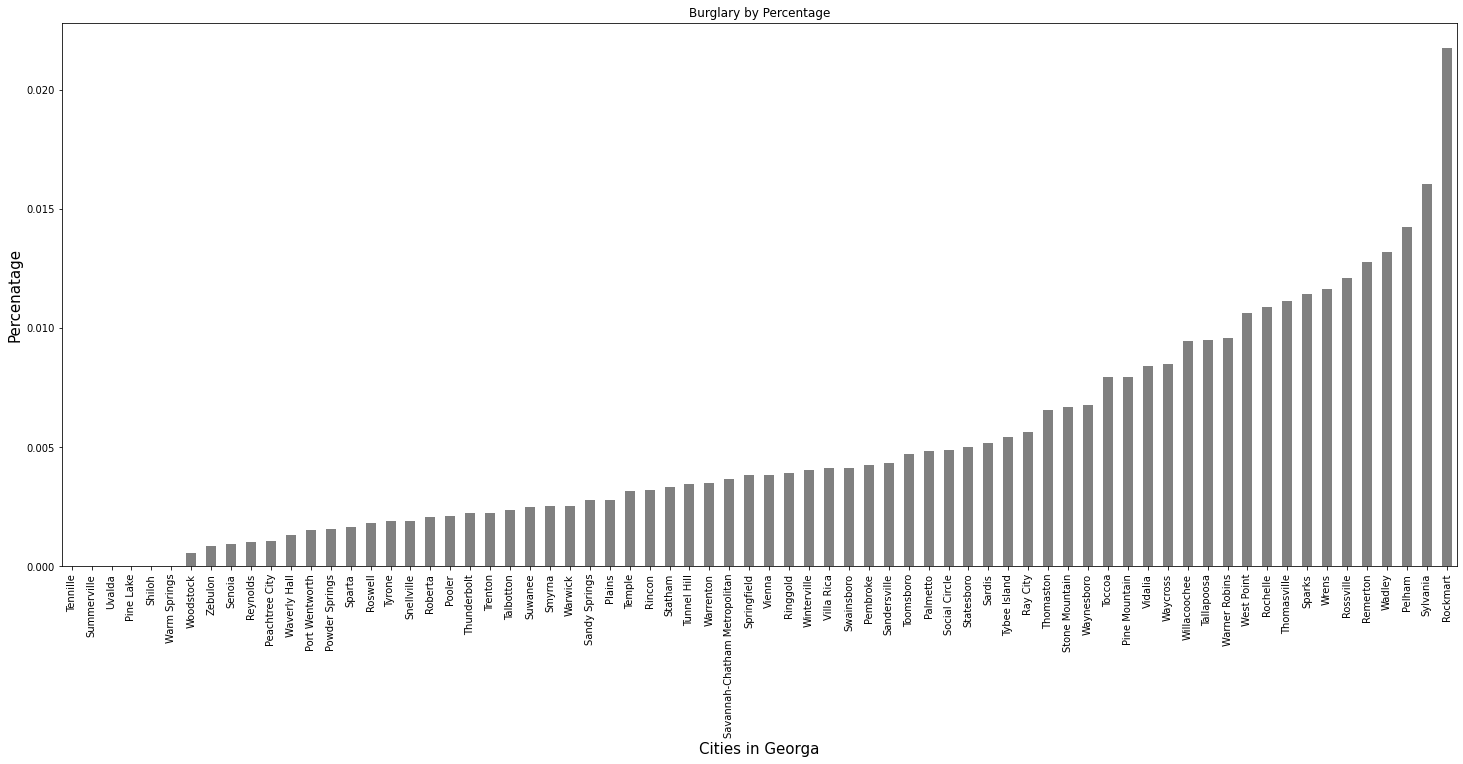

In [ ]:
fbi_dfVCdivPOP = fbi_dfVCdivPOP.sort_values(by=['burglary'], inplace=False)
fbi_newPercentage3 = fbi_dfVCdivPOP['burglary']/fbi_df['population']
fbi_newPercentage3 = fbi_newPercentage3.sort_values()
#sorts the numbers
#divides to get the new numbers
my_plot = fbi_newPercentage3.plot(kind='bar', stacked=True,title="Burglary by Percentage", fontsize = 10, color = 'gray')
my_plot.set_xlabel("Cities in Georga",fontsize = 15, color = 'black')
my_plot.set_ylabel("Percenatage",fontsize = 15)
my_plot = plt.rcParams['figure.figsize'] = [25, 10]

###    <div align="center">                 In the following 70 Cities you can see the percentage of Burglary that occurs, these cities are the ones with the least Burglary Cases. This was calculated by taking the total amount of Burglary cases and dividing it by the population of each given City.

In [ ]:
fbi_dfVCdivPOP = fbi_dfVCdivPOP.sort_values(by=['murder'], inplace=False)
fbi_newPercentage4 = fbi_dfVCdivPOP['murder']/fbi_df['population']
fbi_newPercentage4 = fbi_newPercentage4.sort_values()
#fbi_newPercentage4
#sorts the numbers
#divides to get the new numbers

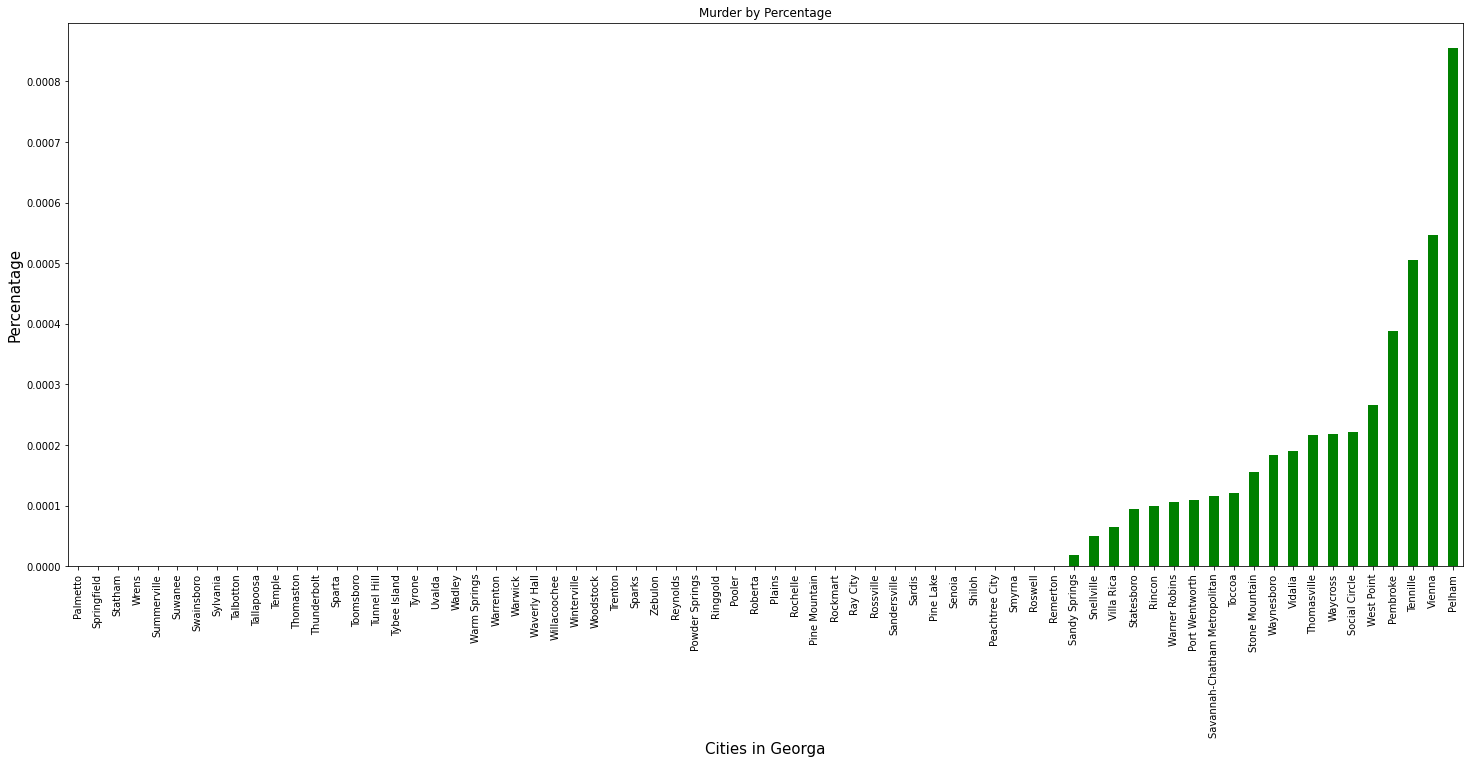

In [ ]:
my_plot1 = fbi_newPercentage4.plot(kind='bar', stacked=True,title="Murder by Percentage", fontsize = 10, color = 'green')
my_plot1.set_xlabel("Cities in Georga",fontsize = 15, color = 'black')
my_plot1.set_ylabel("Percenatage",fontsize = 15)
my_plot1 = plt.rcParams['figure.figsize'] = [25, 10]

###    <div align="center">                 In the following 70 Cities in Gergia you can see the percentage of Murder that occurs, these are the lowest cases or Murder in all of Georgia's cities. This by calculated by taking the total amount of Murder cases and dividing it by the population of the given City.